
![SVG from www](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Kühne_Logistics_University_logo_2019.svg/100px-Kühne_Logistics_University_logo_2019.svg.png)  
# Introduction to Python  
## The basics of python at Kuehne Logistics University  
## Sep-2020  

# Session 5:

Basic data analysis. Correlations and basic linear regressions. Visualizations of the relationship between variables.

## What is correlation?

It is a statistical relationship between two variables. The most common measurement is the pearson correlation coefficient which show the linear relationship between two variables.

 corr(X,Y) is the covariance of XY divided by the multiplication of the standard deviation of X and the standard deviation of Y

## Perfect correlation  
All the variability in one variable is explained by the variability in the other variable.  
When two variables are perfectly correlated, knowing the value of one variable allows you to exactly predict the value of the other variable.

## Less Than Perfect Correlations  
Even if two variables are correlated, most of the time you cannot perfectly predict the value of one variable given the other

# Examples of correlation

In [476]:
import pandas as ap

students = {'Name': ['Maria', 'Anja', 'Bjorn', 'Martin', 'Niklas', 'Sonja'],
           'Age': [19, 21, 20, 21, 19, 20],
           'Hight': [175, 185, 180, 187, 175, 185]
           }
students

{'Name': ['Maria', 'Anja', 'Bjorn', 'Martin', 'Niklas', 'Sonja'],
 'Age': [19, 21, 20, 21, 19, 20],
 'Hight': [175, 185, 180, 187, 175, 185]}

In [477]:
course = pd.DataFrame(students, columns=['Name', 'Age', 'Hight'])
course

,Name,Age,Hight
0,Maria,19,175
1,Anja,21,185
2,Bjorn,20,180
3,Martin,21,187
4,Niklas,19,175
5,Sonja,20,185


In [480]:
tt= course[['Age', 'Hight']].groupby('Age').mean()
tt

,Hight
Age,
19,175.0
20,182.5
21,186.0


<AxesSubplot:xlabel='Age'>

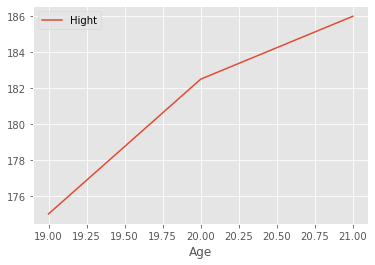

In [481]:
import matplotlib.pyplot as plt
tt.plot()


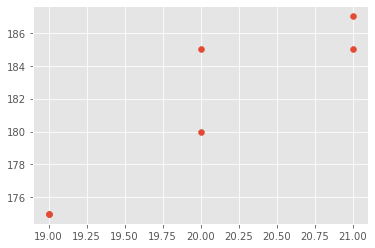

In [482]:
plt.scatter(course.Age, course.Hight)

In [484]:
gender = ['F', 'F', 'M', 'M', 'M', 'F']
course['Gender'] = gender
course

,Name,Age,Hight,Gender
0,Maria,19,175,F
1,Anja,21,185,F
2,Bjorn,20,180,M
3,Martin,21,187,M
4,Niklas,19,175,M
5,Sonja,20,185,F


In [485]:
course[['Age', 'Hight','Gender']].groupby(['Gender', 'Age']).mean()

Hight
Gender Age       
F      19     175
       20     185
       21     185
M      19     175
       20     180
       21     187

In [486]:
course[['Hight', 'Gender']].groupby('Gender').mean()

,Hight
Gender,
F,181.666667
M,180.666667


## How can we see correlations on a more clear way?

In [488]:
tmp = pd.DataFrame(columns=['X'])

for i in range (0,11):
    tmp.loc[len(tmp)] = [i*2]
    
tmp

,X
0,0
1,2
2,4
3,6
4,8
5,10
6,12
7,14
8,16
9,18


In [489]:
tmp['Y'] = tmp['X'].apply(lambda x: x+100)
tmp

,X,Y
0,0,100
1,2,102
2,4,104
3,6,106
4,8,108
5,10,110
6,12,112
7,14,114
8,16,116
9,18,118


<AxesSubplot:>

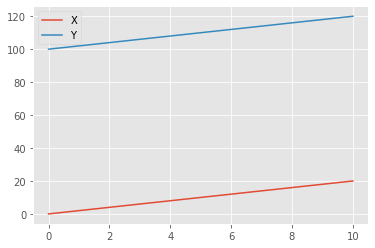

In [490]:
tmp.plot()

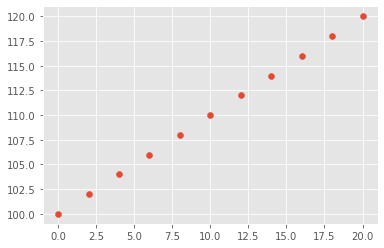

In [491]:
plt.scatter(tmp.X, tmp.Y)

In [492]:
tmp.dtypes

X    object
Y     int64
dtype: object

In [493]:
tmp['X'] = tmp['X'].astype(int)

In [494]:
tmp.dtypes

X    int64
Y    int64
dtype: object

In [495]:
tmp.corr()

,X,Y
X,1.0,1.0
Y,1.0,1.0


In [496]:
for i in range(0, len(tmp)):
    tmp.loc[i, 'Z'] = [i*3]
    
tmp

,X,Y,Z
0,0,100,0.0
1,2,102,3.0
2,4,104,6.0
3,6,106,9.0
4,8,108,12.0
5,10,110,15.0
6,12,112,18.0
7,14,114,21.0
8,16,116,24.0
9,18,118,27.0


In [498]:
tmp['W'] = tmp['X'] * tmp['Z']
tmp['W'] = tmp['W'].astype(int)
tmp

,X,Y,Z,W
0,0,100,0.0,0
1,2,102,3.0,6
2,4,104,6.0,24
3,6,106,9.0,54
4,8,108,12.0,96
5,10,110,15.0,150
6,12,112,18.0,216
7,14,114,21.0,294
8,16,116,24.0,384
9,18,118,27.0,486


In [499]:
tmp.corr()

,X,Y,Z,W
X,1.000000,1.000000,1.000000,0.963143
Y,1.000000,1.000000,1.000000,0.963143
Z,1.000000,1.000000,1.000000,0.963143
W,0.963143,0.963143,0.963143,1.000000


## Manual calculation of correlation:  
## 1- First we calculate the covariance

In [501]:
cov=(tmp['X']-tmp['X'].mean())*(tmp['Y']-tmp['Y'].mean())
cov

0     100.0
1      64.0
2      36.0
3      16.0
4       4.0
5       0.0
6       4.0
7      16.0
8      36.0
9      64.0
10    100.0
dtype: float64

In [503]:
cov2 = sum(i for i in cov)
cov2

440.0

## 2- Then we calculate the standard deviation

In [504]:
varx = tmp['X'].std()

In [505]:
vary = tmp['Y'].std()

In [506]:
var = varx*vary
var

44.0

## 3- And finaly, the pearson correlation coefficient

In [508]:
cov2/var/10

1.0

## Examples with random data.  
Source: https://benalexkeen.com/correlation-in-python/

## Positive correlation

In [509]:
import numpy as np

np.random.seed(1)

In [512]:
#give me 1000 random numbers that go from 0 to 50
X = np.random.randint(0, 50, 1000)

In [513]:
#Create another variable that has to be positively correlated to X 

Y = X + np.random.normal(0,10, 1000)

In [514]:
np.corrcoef(X,Y)

array([[1.        , 0.82468616],
       [0.82468616, 1.        ]])

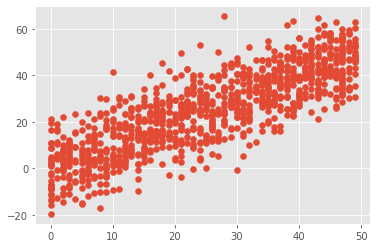

In [515]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X,Y)
plt.show()

## Negative correltation

In [516]:
X = np.random.randint(0,50,1000)

Y = 100 - X + np.random.normal(0,5, 1000)

np.corrcoef(X,Y)

array([[ 1.        , -0.94736598],
       [-0.94736598,  1.        ]])

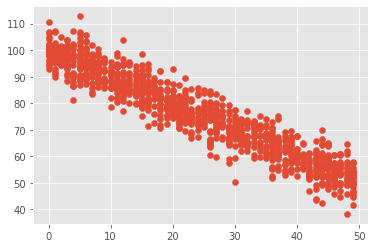

In [517]:
plt.scatter(X,Y)
plt.show()

## Weak correlation

In [518]:
X = np.random.randint(0, 50, 1000)
Y = np.random.randint(0, 50, 1000)

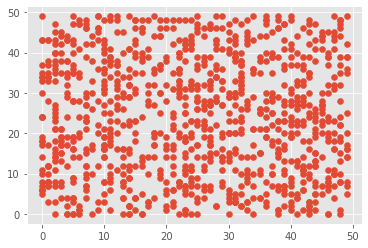

In [519]:
plt.scatter(X,Y)
plt.show()

In [520]:
np.corrcoef(X,Y)

array([[ 1.       , -0.0220072],
       [-0.0220072,  1.       ]])

## Another example with random data:   
## Correlation Table

In [521]:
import pandas as pd

df = pd.DataFrame({'a': np.random.randint(0,50,1000)               
                  })



In [522]:
#positive correlation with a
df['b'] = df['a']+ np.random.normal(0,10,1000)
#negative correlation with a
df['c'] = 100 - df['a']+np.random.normal(0,5, 1000)
#uncorrelated with a
df['d'] = df['a'] + np.random.randint(0, 50, 1000)


In [523]:
df.head()

,a,b,c,d
0,8,18.196673,76.809582,20
1,3,17.266559,102.916374,48
2,5,19.239899,93.061810,43
3,47,42.779420,48.282059,91
4,1,0.818012,97.894909,47


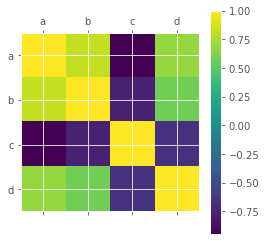

In [524]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Other plots that might help

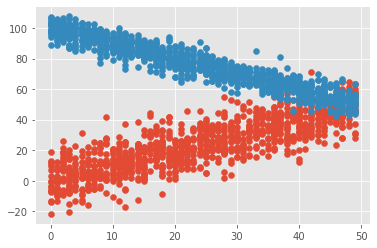

In [528]:
plt.scatter(df.a, df.b)
plt.scatter(df.a, df.c)
#plt.scatter(df.a, df.d)

## Exercise 1:
- Create a list of 10 numbers that is a function (any function) of the index.
- Exchange your list with a colleague and create a dataframe with these two lists.
- Add a column to your data frame with random numbers that go from 1 to 50.
- Plot the scatter between your variable and your colleagues' variable.
- Plot the scatter between your variable and the random one.
- Calculate and analyze the sign and size of the correlations.

## Exercise 1b:  
- Calculate manually the pearson coefficient and see if you reached the same value.

## Other examples importing database

## Import libraries

In [541]:
import sklearn
from scipy import stats
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.datasets import longley
from statsmodels.formula.api import ols



## Import dataset  
https://openei.org/datasets/dataset/consumption-outdoor-air-temperature-11-commercial-buildings

Hourly energy consumption and outdoor air temperature data for 11 commercial buildings (office/retail).

In [542]:
dataf = pd.read_csv('/home/tamara/Downloads/building1retail.csv', 
                    index_col=[0], 
                 date_parser=lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))
dataf.head()

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8


<AxesSubplot:xlabel='Timestamp'>

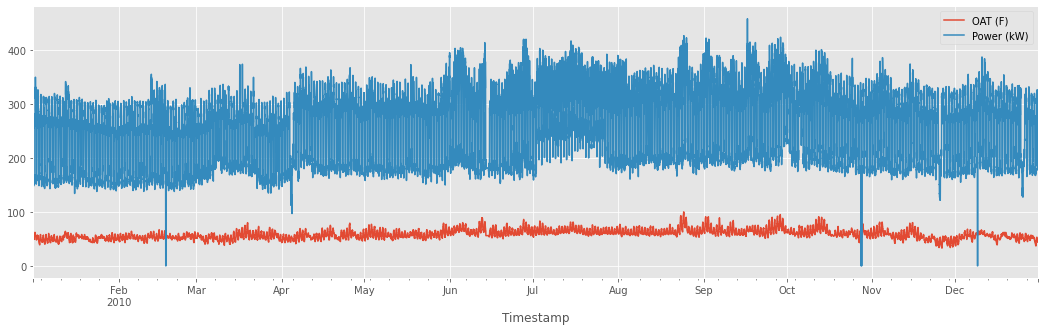

In [543]:
dataf.plot(figsize=(18,5))

## Plot data

## Plot the distribution

array([[<AxesSubplot:title={'center':'OAT (F)'}>,
        <AxesSubplot:title={'center':'Power (kW)'}>]], dtype=object)

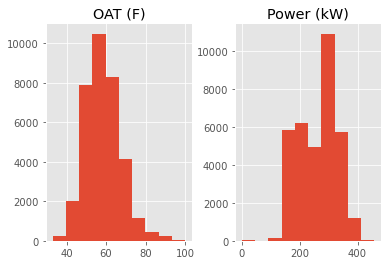

In [544]:
dataf.hist()

<AxesSubplot:>

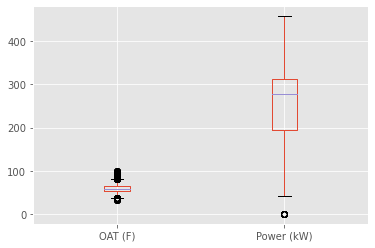

In [545]:
dataf.boxplot()

## Remove outliers

In [546]:
std_dev=3
dataf_new = dataf[(np.abs(stats.zscore(dataf)) < float(std_dev)).all(axis=1)]

<AxesSubplot:>

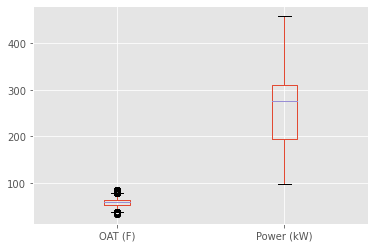

In [547]:
dataf_new.boxplot()

## Plot the clean data

## Look for linear relationship

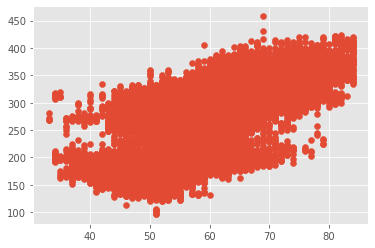

In [548]:
plt.scatter(dataf_new['OAT (F)'], dataf_new['Power (kW)'])

## Check correlation

In [549]:

dataf_new.corr()


,OAT (F),Power (kW)
OAT (F),1.000000,0.621196
Power (kW),0.621196,1.000000


## Make a nice correlation table

In [552]:
ols_model = statsmodels.regression.linear_model.OLS(dataf_new[['Power (kW)']], dataf_new[['OAT (F)']])
ols_fit = ols_model.fit()
print(ols_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:             Power (kW)   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          9.323e+05
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:15:55   Log-Likelihood:                     -1.8489e+05
No. Observations:               34577   AIC:                                  3.698e+05
Df Residuals:                   34576   BIC:                                  3.698e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Source: 
https://github.com/phgupta/Blog/blob/master/Linear_Regression_Python/Linear_Regression.ipynb

## Another database with more covariates

National Supported Work – Dehejia and Wahba (1999)
The National Supported Work programme was a federal programme in the US which provided work experience to individuals who had faced economic problems in the past. Individuals were randomly assigned to participate in the programme from a pool of applicants between 1975 and 1977, and both treatment and control individuals were interviewed in 1978 and asked about the amount of money they were currently earning. The experimental data from this programme is stored in the nsw_exper.dta file.


treat (1 = experimental treatment group; 0 = observational comparison group)
age (age in years)
educ (years of schooling)
black (1 if black; 0 otherwise)
hisp (1 if Hispanic; 0 otherwise)
married (1 if married; 0 otherwise)
nodegree (1 if no high school diploma; 0 otherwise)
educcat (1 = did not finish high school, 2 = high school, 3 = some college, 4 = graduated from college)
re74, re75, re78 (real earnings in 1974, 1975 and 1978)

In [451]:
data = pd.read_stata('/home/tamara/Desktop/nsw_exp.dta'
                              )
data.head()


,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78
0,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.045898
1,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.894043
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.449219
3,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.145996
4,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.789886
